In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import FunctionTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv(r"C:\Users\khushi pawar\Downloads\train.csv",usecols=['Age','Fare','Survived'])

In [4]:
df.sample(5)

,Survived,Age,Fare
104,0,37.0,7.9250
419,0,10.0,24.1500
479,1,2.0,12.2875
362,0,45.0,14.4542
231,0,29.0,7.7750


In [5]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [6]:
X_train,X_test,y_train,y_test=train_test_split(df[['Age','Fare']],df['Survived'],test_size=0.2,random_state=42)

In [7]:
X_train.head(5)

,Age,Fare
331,45.5,28.5000
733,23.0,13.0000
382,32.0,7.9250
704,26.0,7.8542
813,6.0,31.2750


In [8]:
X_test.head(5)

,Age,Fare
709,29.699118,15.2458
439,31.000000,10.5000
840,20.000000,7.9250
720,6.000000,33.0000
39,14.000000,11.2417


In [9]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [10]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

C:\Users\khushi pawar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Fare', ylabel='Density'>

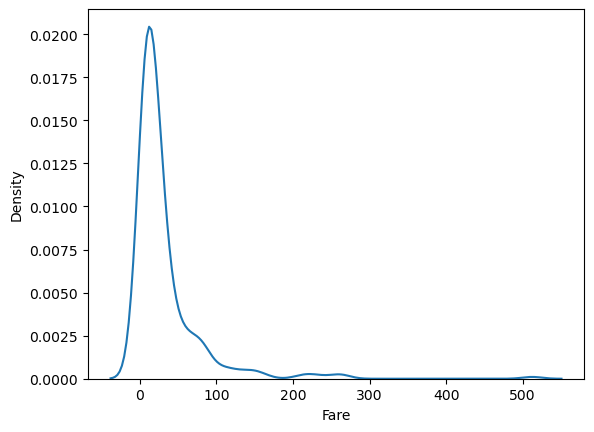

In [11]:
sns.kdeplot(x='Fare',data=df)

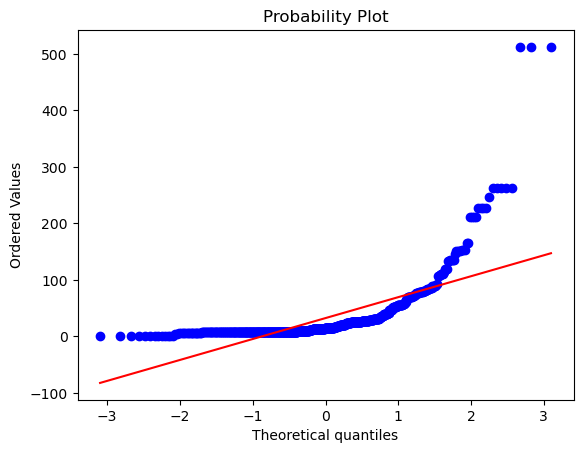

In [12]:
stats.probplot(X_train['Fare'],dist="norm",plot=plt)
plt.grid=True

In [13]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [14]:
df['Age'].isnull().sum()

0

In [17]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

pred=clf.predict(X_test)
pred1=clf2.predict(X_test)

print("accuracy lr",accuracy_score(y_test,pred))
print("accuracy decision tree",accuracy_score(y_test,pred1))

accuracy lr 0.6480446927374302
accuracy decision tree 0.6703910614525139


In [19]:
trf=FunctionTransformer(func=np.log1p)

In [26]:
X_train_trf=trf.fit_transform(X_train)
X_test_trf=trf.transform(X_test)

In [28]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [30]:
clf.fit(X_train_trf,y_train)
clf2.fit(X_train_trf,y_train)

pred=clf.predict(X_test_trf)
pred1=clf2.predict(X_test_trf)

print("accuracy logi...",accuracy_score(y_test,pred))
print("accuracy deci...",accuracy_score(y_test,pred1))

accuracy logi... 0.6815642458100558
accuracy deci... 0.6927374301675978


TypeError: 'bool' object is not callable

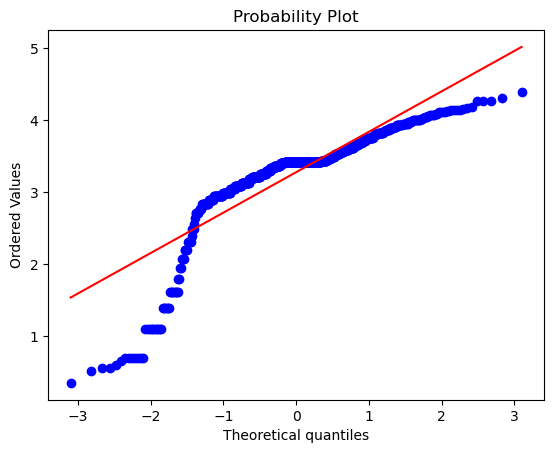

In [56]:
stats.probplot(X_train_trf['Age'],dist="norm",plot=plt)
plt.grid(True)
plt.show()

TypeError: 'bool' object is not callable

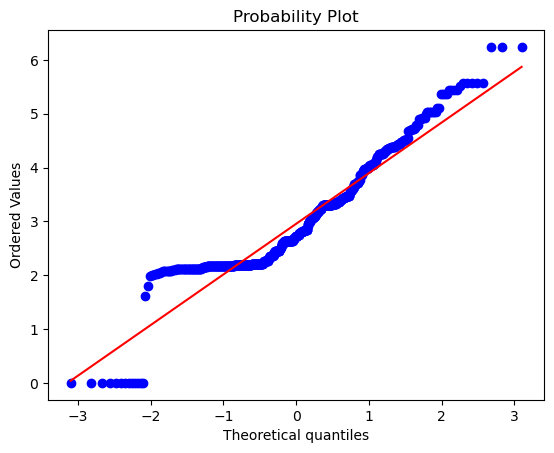

In [57]:
stats.probplot(X_train_trf['Fare'],dist="norm",plot=plt)
plt.grid(True)

In [112]:
trf=ColumnTransformer(transformers=[
    ("ft",FunctionTransformer(func=np.reciprocal),['Fare'])
],remainder='passthrough')

In [113]:
trained_X=trf.fit_transform(X_train)
test_x=trf.transform(X_test)

C:\Users\khushi pawar\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: divide by zero encountered in reciprocal
  result = func(self.values, **kwargs)
C:\Users\khushi pawar\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: divide by zero encountered in reciprocal
  result = func(self.values, **kwargs)


In [114]:
trained_X

array([[3.50877193e-02, 4.55000000e+01],
       [7.69230769e-02, 2.30000000e+01],
       [1.26182965e-01, 3.20000000e+01],
       ...,
       [7.08802620e-02, 4.10000000e+01],
       [8.33333333e-03, 1.40000000e+01],
       [1.29387029e-02, 2.10000000e+01]])

C:\Users\khushi pawar\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


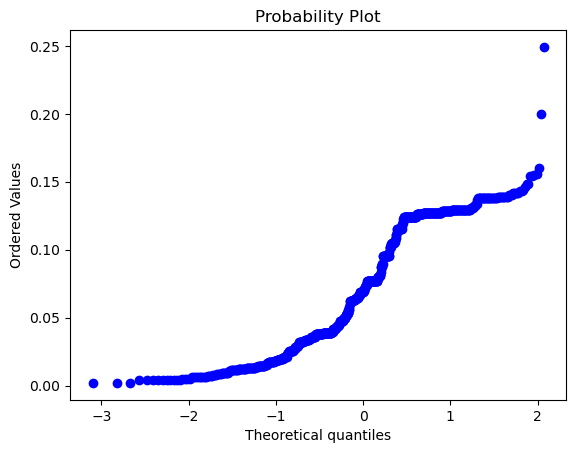

In [115]:
stats.probplot(trained_X[:,0],dist="norm",plot=plt)
plt.grid=True

In [53]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [54]:
clf.fit(trained_X,y_train)
clf2.fit(trained_X,y_train)

pred=clf.predict(test_x)
pred1=clf2.predict(test_x)

print("accuracy logi...",accuracy_score(y_test,pred))
print("accuracy dec...",accuracy_score(y_test,pred1))

accuracy logi... 0.6703910614525139
accuracy dec... 0.6815642458100558


In [62]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [63]:
df = pd.read_csv(r"C:\Users\khushi pawar\Downloads\train.csv",usecols=['Age','Fare','Survived'])

In [64]:
df.head(2)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833


In [70]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [71]:
df['Age'].isnull().sum()

0

In [89]:
def apply(transform):
    X=df.iloc[:,1:3]
    Y=df.iloc[:,0]

    
    trf1=ColumnTransformer([
        ('log_tran.',FunctionTransformer(transform),['Fare'])
    ],remainder='passthrough')
    
    train_it=trf1.fit_transform(X)

    clf=LogisticRegression()
    print("Accuracy",np.mean(cross_val_score(clf,train_it,Y,scoring='accuracy',cv=10)))

    plt.subplot(121)
    stats.probplot(X['Fare'],dist="norm",plot=plt)
    plt.title("before")

    plt.subplot(122)
    stats.probplot(train_it[:,0],dist="norm",plot=plt)
    plt.title("after")

    plt.show()

C:\Users\khushi pawar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\khushi pawar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_o

Accuracy 0.61729088639201


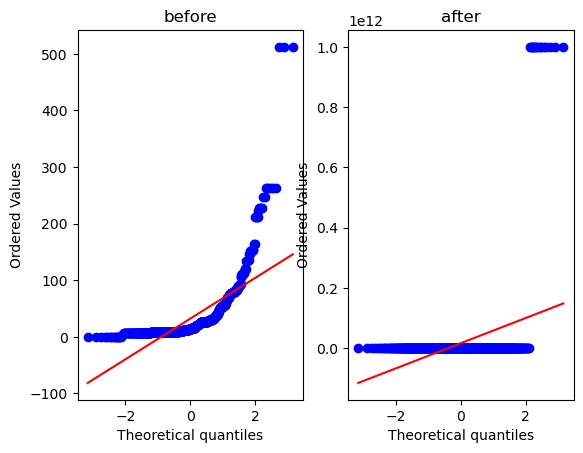

In [121]:
apply(lambda x:1/(x+0.000000000001))

In [85]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    

Accuracy 0.6442446941323345


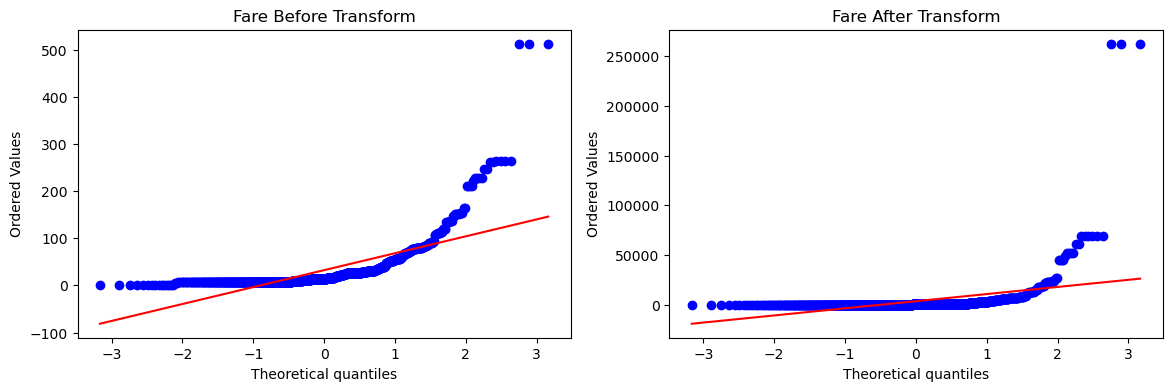

In [111]:
apply_transform(lambda x:x**2)